In [1]:
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='roberta-large'

# the commands below didn't work inside for loop and got CUDA out of memory Error.
#     with torch.no_grad():
#        torch.cuda.empty_cache()
#    del data, model, trainer, acc, f1
# Instead of running these commands in a loop, execute them cell by cell, restarting between them.
# Each cell will print its results. To keep the results and avoid re-running specific cells, skip them intermittently on each run.

In [3]:
results = {'acc':[],
           'f1':[],
           'lr':[]}

In [4]:
lr = 1.0e-5

print(f'Grid search {model_checkpoint}, learning rate {lr}')
data = ClimateDataset(model_to_train=2,model_checkpoint=model_checkpoint,batch_size=16)
data.setup_dataloaders()
model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
trainer = Engine(epochs=30,labels=data.labels)
trainer.model = model.model
acc, f1 = trainer.run(lr=lr,
                      wd=0.0,
                      train_dataloader=data.train_dataloader,
                      eval_dataloader=data.eval_dataloader,
                      test_dataloader=data.test_dataloader,
                      accumulation_steps=2,
                      early_stop=3)
results['acc'].append(acc)
results['f1'].append(f1)
results['lr'].append(lr)
print('### '*10)
print(results)
print('### '*10)

Grid search roberta-large, learning rate 1e-05


Filter:   0%|          | 0/1796 [00:00<?, ? examples/s]

Filter:   0%|          | 0/256 [00:00<?, ? examples/s]

Filter:   0%|          | 0/457 [00:00<?, ? examples/s]

Map:   0%|          | 0/472 [00:00<?, ? examples/s]

Map:   0%|          | 0/67 [00:00<?, ? examples/s]

Map:   0%|          | 0/119 [00:00<?, ? examples/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.5481	Val Loss:	1.0713	Accuracy:	0.3782	F1:	0.1829
2 / 30: Train Loss:	0.5026	Val Loss:	0.7534	Accuracy:	0.6723	F1:	0.6501
3 / 30: Train Loss:	0.3269	Val Loss:	0.5481	Accuracy:	0.7731	F1:	0.7699
4 / 30: Train Loss:	0.2009	Val Loss:	0.5986	Accuracy:	0.8235	F1:	0.8169
5 / 30: Train Loss:	0.1153	Val Loss:	0.6658	Accuracy:	0.7899	F1:	0.7875
6 / 30: Train Loss:	0.0911	Val Loss:	0.5852	Accuracy:	0.8319	F1:	0.8280
7 / 30: Train Loss:	0.0564	Val Loss:	0.5299	Accuracy:	0.8403	F1:	0.8383
8 / 30: Train Loss:	0.0386	Val Loss:	0.6042	Accuracy:	0.8319	F1:	0.8300
9 / 30: Train Loss:	0.0243	Val Loss:	0.7008	Accuracy:	0.8403	F1:	0.8357
10 / 30: Train Loss:	0.0147	Val Loss:	1.0543	Accuracy:	0.7899	F1:	0.7834
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                    precision    recall  f1-score   support

 misrepresentation       0.96      0.58      0.72        38
oversimplification       0.90      0.75      0.82        36
slothful i

In [4]:
lr = 5.0e-5

print(f'Grid search {model_checkpoint}, learning rate {lr}')
data = ClimateDataset(model_to_train=2,model_checkpoint=model_checkpoint,batch_size=16)
data.setup_dataloaders()
model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
trainer = Engine(epochs=30,labels=data.labels)
trainer.model = model.model
acc, f1 = trainer.run(lr=lr,
                      wd=0.0,
                      train_dataloader=data.train_dataloader,
                      eval_dataloader=data.eval_dataloader,
                      test_dataloader=data.test_dataloader,
                      accumulation_steps=2,
                      early_stop=3)
results['acc'].append(acc)
results['f1'].append(f1)
results['lr'].append(lr)
print('### '*10)
print(results)
print('### '*10)

Grid search roberta-large, learning rate 5e-05


Map:   0%|          | 0/67 [00:00<?, ? examples/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.out_proj.weight', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.5092	Val Loss:	0.6690	Accuracy:	0.6639	F1:	0.6365
2 / 30: Train Loss:	0.3573	Val Loss:	0.6382	Accuracy:	0.7479	F1:	0.7434
3 / 30: Train Loss:	0.2214	Val Loss:	0.6200	Accuracy:	0.7983	F1:	0.7947
4 / 30: Train Loss:	0.2119	Val Loss:	0.6348	Accuracy:	0.6975	F1:	0.7008
5 / 30: Train Loss:	0.1047	Val Loss:	1.0008	Accuracy:	0.7815	F1:	0.7756
6 / 30: Train Loss:	0.0465	Val Loss:	0.9342	Accuracy:	0.8067	F1:	0.8012
7 / 30: Train Loss:	0.0722	Val Loss:	0.8138	Accuracy:	0.8067	F1:	0.7984
8 / 30: Train Loss:	0.0563	Val Loss:	0.9096	Accuracy:	0.8067	F1:	0.8024
9 / 30: Train Loss:	0.0434	Val Loss:	1.5151	Accuracy:	0.7395	F1:	0.7322
10 / 30: Train Loss:	0.0635	Val Loss:	0.9440	Accuracy:	0.7815	F1:	0.7752
11 / 30: Train Loss:	0.0376	Val Loss:	1.5124	Accuracy:	0.7311	F1:	0.7206
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                    precision    recall  f1-score   support

 misrepresentation       1.00      0.45      0.62        

In [4]:
lr = 1.0e-4

print(f'Grid search {model_checkpoint}, learning rate {lr}')
data = ClimateDataset(model_to_train=2,model_checkpoint=model_checkpoint,batch_size=16)
data.setup_dataloaders()
model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
trainer = Engine(epochs=30,labels=data.labels)
trainer.model = model.model
acc, f1 = trainer.run(lr=lr,
                      wd=0.0,
                      train_dataloader=data.train_dataloader,
                      eval_dataloader=data.eval_dataloader,
                      test_dataloader=data.test_dataloader,
                      accumulation_steps=2,
                      early_stop=3)
results['acc'].append(acc)
results['f1'].append(f1)
results['lr'].append(lr)
print('### '*10)
print(results)
print('### '*10)

Grid search roberta-large, learning rate 0.0001


Map:   0%|          | 0/119 [00:00<?, ? examples/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.5510	Val Loss:	0.9461	Accuracy:	0.5210	F1:	0.5068
2 / 30: Train Loss:	0.4976	Val Loss:	1.0624	Accuracy:	0.3950	F1:	0.3379
3 / 30: Train Loss:	0.5631	Val Loss:	1.0958	Accuracy:	0.3782	F1:	0.1829
4 / 30: Train Loss:	0.5537	Val Loss:	1.0943	Accuracy:	0.3782	F1:	0.1829
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                    precision    recall  f1-score   support

 misrepresentation       0.00      0.00      0.00        38
oversimplification       0.00      0.00      0.00        36
slothful induction       0.38      1.00      0.55        45

          accuracy                           0.38       119
         macro avg       0.13      0.33      0.18       119
      weighted avg       0.14      0.38      0.21       119

test results:
                    precision    recall  f1-score   support

 misrepresentation       0.00      0.00      0.00        22
oversimplification       0.00      0.00      0.00        20
slothf

In [28]:
from collections import defaultdict 

a = {'acc': [0.7313432835820896], 'f1': [0.7310998000653172], 'lr': [1e-05]}
b = {'acc': [0.7313432835820896], 'f1': [0.7294261294261294], 'lr': [5e-05]}
c = {'acc': [0.373134328358209], 'f1': [0.1811594202898551], 'lr': [0.0001]}

results = defaultdict(list)
for d in (a,b,c):
    for k,v in d.items():
        results[k].append(v[0])

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

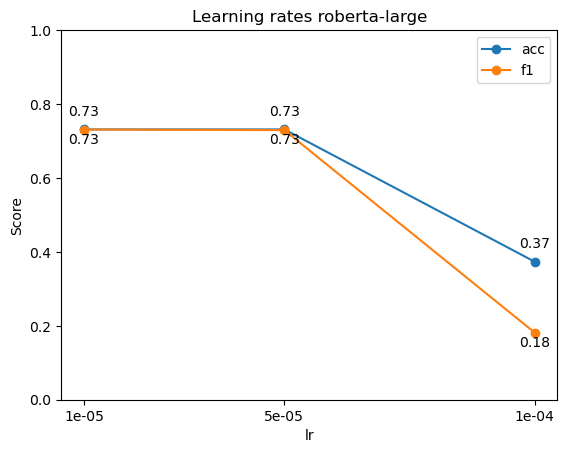

In [30]:
def plot_grid_search(df, title):

    # Create the plot
    ax = df.plot(x='lr', y=['acc', 'f1'], marker='o', linestyle='-')

    # Set y-axis range between 0 and 1
    plt.ylim(0, 1)

    # Annotate points with F1 scores
    for i, row in df.iterrows(): 
        ax.annotate(f'{row["f1"]:.2f}', (row["lr"], row["f1"]), textcoords='offset points', xytext=(0, -10), ha='center')

    # Annotate points with Acc scores
    for i, row in df.iterrows():
        ax.annotate(f'{row["acc"]:.2f}', (row["lr"], row["acc"]), textcoords='offset points', xytext=(0, 10), ha='center')
    
    # 
    plt.xticks(df['lr'], [f'{val:.0e}' for val in df['lr']], ha='center')
    # plt.xscale('log')
    plt.minorticks_off()

    plt.title(title)
    plt.xlabel('lr')
    plt.ylabel('Score')
    plt.show()

plot_grid_search(pd.DataFrame(results), f'Learning rates {model_checkpoint}')